In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.ticker as ticker
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [2]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

This notebook is to plot all of the data associated with the resonant tunneling states seen in SCF96.

In [3]:
cold_dir = '/Volumes/JUPITER/Data/SCF96/q3/'
thesis_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

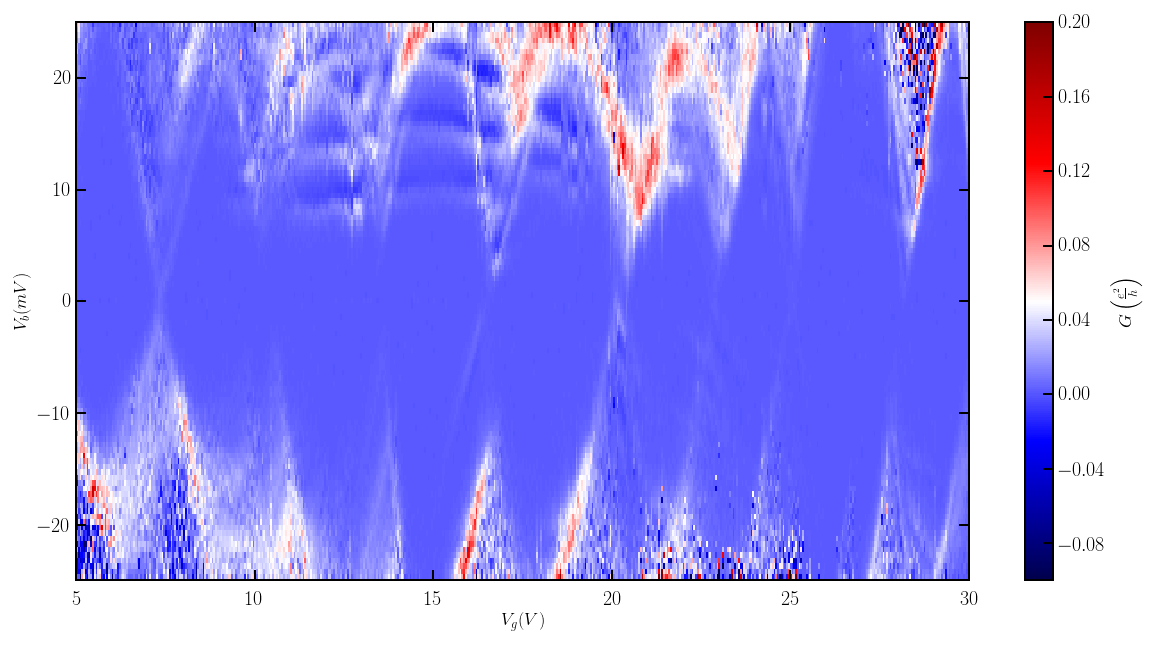

In [4]:
# conductance in zero field...

f = os.path.join(cold_dir, 'vi-gate_16-17_23_a.bin')
zf = lvdt.get_data_3d(f) # zero field
zf = zf.groupby(zf.index).mean()
zf.index = zf.index*1000
# print zf.index[0:5]

zf_cond = get_dIdV(zf, 500e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(zf_cond)
im = ax.imshow(zf_cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.2, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

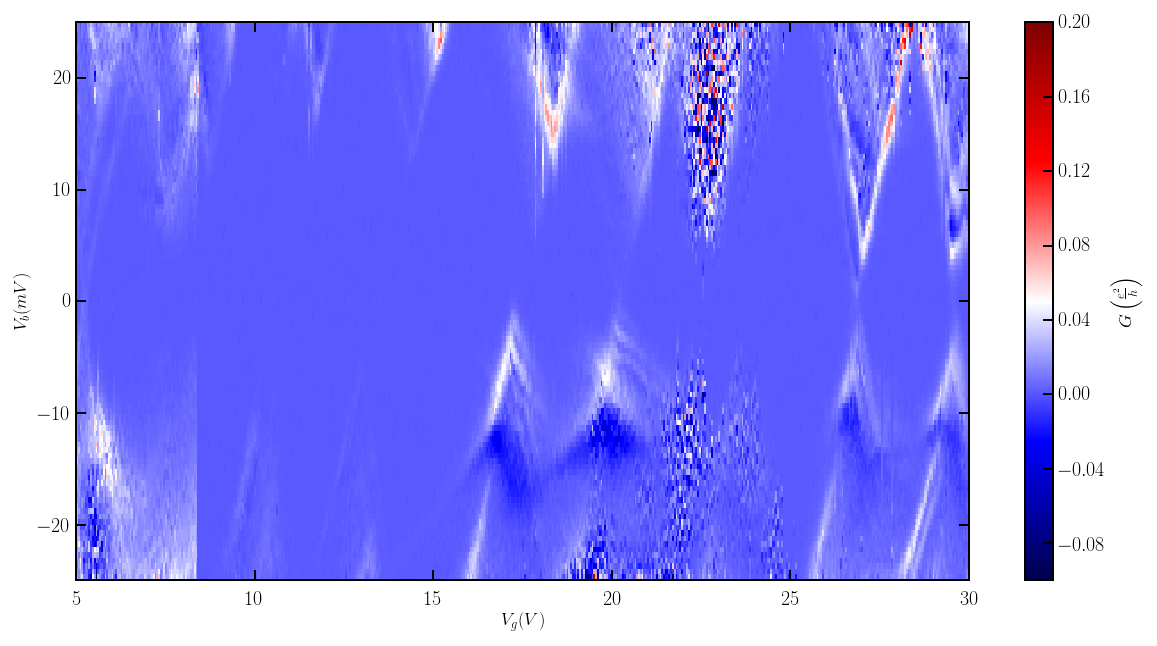

In [5]:
# conductance in 2T field

f = os.path.join(cold_dir, 'vi-gate_16-17_23_a_2T.bin')
nzf = lvdt.get_data_3d(f) #non-zero field
nzf = nzf.groupby(nzf.index).mean()
nzf.index = nzf.index*1000
# print nzf.index[0:5]

nzf_cond = get_dIdV(nzf, 500e-6)/3.875e-5
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(nzf_cond)
im = ax.imshow(nzf_cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.2, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

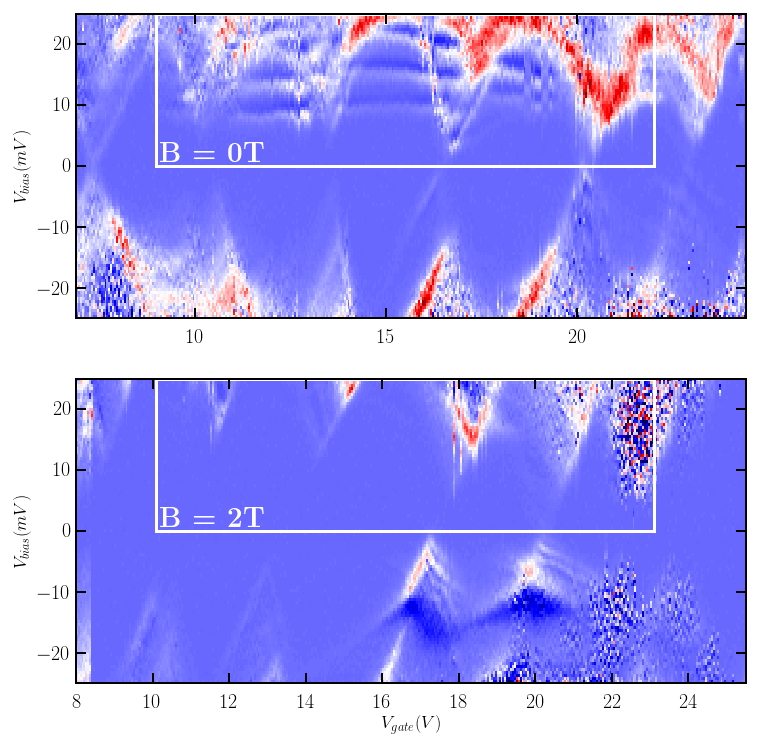

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12, 12), sharex = False, sharey = False)
limits1 = lvdt.df_extent(zf_cond)
im1 = ax1.imshow(zf_cond, extent = limits1, 
               cmap = plt.cm.seismic, vmin = -0.08, vmax=0.15, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_ylabel(r'$V_{bias} (mV)$')
limits2 = lvdt.df_extent(nzf_cond)
im2 = ax2.imshow(nzf_cond, extent = limits2, 
               cmap = plt.cm.seismic, vmin = -0.08, vmax=0.15, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax2.set_xlabel(r'$V_{gate} (V)$')
ax2.set_ylabel(r'$V_{bias} (mV)$')

ax1.set_xlim(6.9,24.4)
ax2.set_xlim(8,25.5)

ax1.text(9.1, 0.8, r'\textbf{B = 0T}', color = 'w', fontsize = 28)
ax2.text(10.2, 0.8, r'\textbf{B = 2T}', color = 'w', fontsize = 28)

# label region of interest
from matplotlib.patches import Rectangle

ax.set_xlim(9,22)
ax.set_ylim(0,25)

from matplotlib.patches import Polygon

verts1 = [(9., 0.), (22., 0.), (22., 25.),(9., 25.)]
ax1.add_patch(Polygon(verts1, closed=True, fill=False, color='w', linewidth = 3))
verts2 = [(10.1, 0.), (23.1, 0.), (23.1, 25.),(10.1, 25.)]
ax2.add_patch(Polygon(verts2, closed=True, fill=False, color='w', linewidth = 3))

fig.savefig(os.path.join('/Users/nik/Dropbox/Repos/thesis/figures/fmdots/','scf96_resonant_tunneling_conductance.png'), dpi=300)

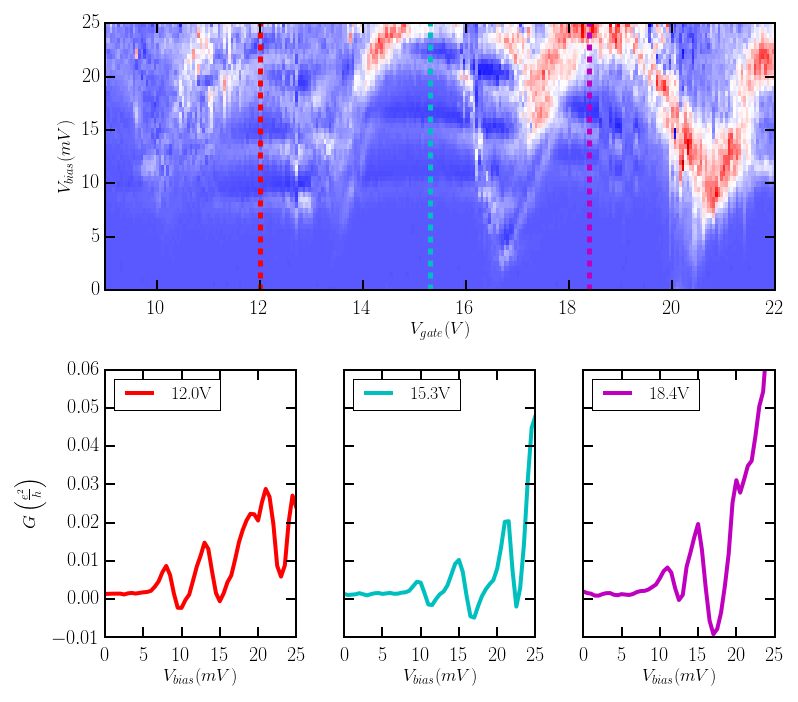

In [7]:
######### show a close up of the data plus some cuts of it using gridspec ############
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (12,11))
gs = gridspec.GridSpec(2, 3)
gs.update(hspace=0.3, wspace=0.25)

zf_cond = get_dIdV(zf, 500e-6)/3.875e-5

ax = fig.add_subplot(gs[0,:])
limits = lvdt.df_extent(zf_cond)
im = ax.imshow(zf_cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.2, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.plot((12, 12), (0, 25), 'r--', lw = 5)
ax.plot((15.3, 15.3), (0, 25), 'c--', lw = 5)
ax.plot((18.4, 18.4), (0, 25), 'm--', lw = 5)
ax.set_xlabel(r'$V_{gate} (V)$')
ax.set_ylabel(r'$V_{bias} (mV)$')

ax.set_xlim(9,22)
ax.set_ylim(0,25)

################# cuts from that plot ###################

gates = [12.0, 15.3, 18.4]
colors = ['r', 'c', 'm']
dg = 0.05

ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])
axes = [ax1, ax2, ax3]

for i, gate in enumerate(gates):
    line = zf_cond.loc[:,(gate-dg, gate, gate+dg)].mean(axis=1)
    axes[i].plot(line.index, line, color = colors[i], label = '{0:.1f}V'.format(gate))
    axes[i].set_xlim(0, 25)
    axes[i].set_ylim(-0.01, 0.06)
    axes[i].legend(loc = 'upper left')
    axes[i].set_xlabel('$V_{bias} (mV)$')
ax1.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax2.set_yticklabels([])
ax3.set_yticklabels([])

fig.savefig(os.path.join('/Users/nik/Dropbox/Repos/thesis/figures/fmdots/','scf96_resonant_tunneling_cuts.png'), dpi=300)

In [8]:
def get_data_ps(filename):
    """ returns a pandas array with the 2d data from the binary file
        tagged with relevant information from the header file """
    
    
    df = lvdt.get_data_2d(filename) # get data
    df['Bias'] *= 1000.0
    
    dt = df['dt'].mean()
    M, N = df.ix[:,'i0':].shape
    t = np.arange(0,N)*dt # time series (s)
    freqs = np.fft.fftfreq(N, dt) # frequency (Hz)
    idx = np.argsort(freqs) # sort arrays with this
    freqs = freqs[idx]
    
    # get the white noise spectrum
    white = np.zeros(N)
    i = 0.0
    for s in df[np.abs(df['Bias'])<1e-6].ix[:,'i0':].values:
        white += np.abs(np.fft.fft(s))**2
        i +=1.0
    white = white[idx]/i
    
    # setup dataframe
    cols = ['Bias', 'Iavg']
    cols.extend([f for f in freqs[N/2:]])
    psdf = pd.DataFrame(np.zeros((M,N/2+2)), columns = cols)
    psdf[['Bias','Iavg']] = df[['Bias','Iavg']]
    for j, s in enumerate(df.ix[:,'i0':].values):
        ps = np.abs(np.fft.fft(s))**2
        psdf.iloc[j,2:] = ps[idx][N/2:] - white[N/2:]
    return psdf.groupby(psdf['Bias']).mean()

In [9]:
gate = zf.columns.values
filelist = [os.path.join(cold_dir, 'vi-gate_16-17_23_a_{0:.0f}.bin'.format(g*1000)) for g in gate]

offset = zf.loc[0.0, :].mean()
ampdf = pd.DataFrame(np.zeros(zf.shape), index = zf.index, columns = zf.columns)

for j, f in enumerate(filelist[0:]):
    psdf = get_data_ps(f)
    current = psdf['Iavg'] - offset
    
    for index, row in psdf.iterrows():
        ampdf.loc[index,gate[j]] = np.mean(row[2:]*psdf.columns[2:])

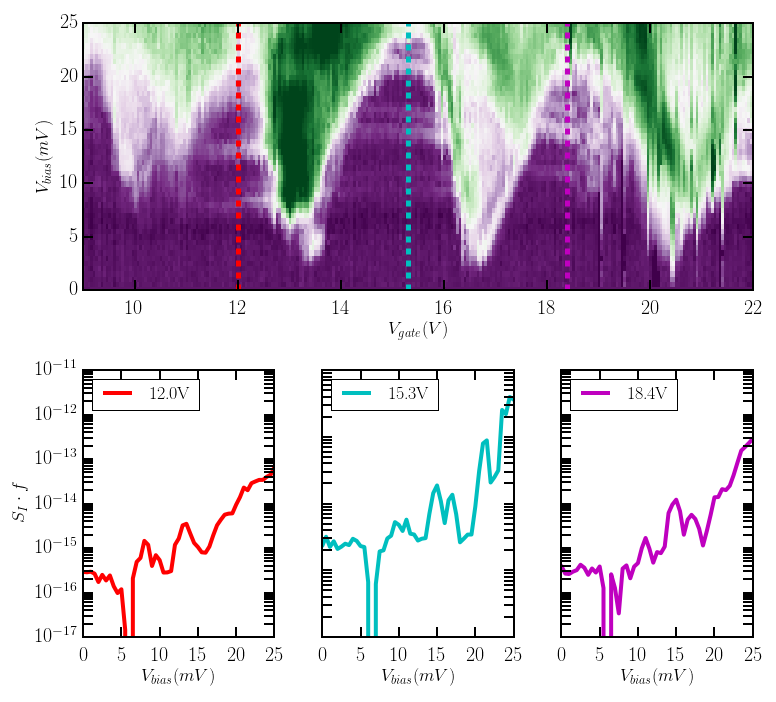

In [10]:
# same plot as above, but using the 1/f noise amplitude, rather than the conductance.

######### show a close up of the data plus some cuts of it using gridspec ############
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (12,11))
gs = gridspec.GridSpec(2, 3)
gs.update(hspace=0.3, wspace=0.25)

ax = fig.add_subplot(gs[0,:])
limits = lvdt.df_extent(ampdf)
im = ax.imshow(np.log10(ampdf-ampdf.min().min()), extent = limits, 
               cmap = plt.cm.PRGn, vmin = -15, vmax = -12, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.plot((12, 12), (0, 25), 'r--', lw = 5)
ax.plot((15.3, 15.3), (0, 25), 'c--', lw = 5)
ax.plot((18.4, 18.4), (0, 25), 'm--', lw = 5)
ax.set_xlabel(r'$V_{gate} (V)$')
ax.set_ylabel(r'$V_{bias} (mV)$')

ax.set_xlim(9,22)
ax.set_ylim(0,25)

################# cuts from that plot ###################

gates = [12.0, 15.3, 18.4]
colors = ['r', 'c', 'm']
dg = 0.05

ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])
axes = [ax1, ax2, ax3]

for i, gate in enumerate(gates):
    line = ampdf.loc[:,(gate-dg, gate, gate+dg)].mean(axis=1)
    axes[i].plot(line.index, line-line.min(), color = colors[i], label = '{0:.1f}V'.format(gate))
    axes[i].set_xlim(0, 25)
    axes[i].set_yscale('log')
    axes[i].legend(loc = 'upper left')
    axes[i].set_xlabel('$V_{bias} (mV)$')
ax1.set_ylabel(r'$S_I \cdot f$')
ax2.set_yticklabels([])
ax3.set_yticklabels([])

fig.savefig(os.path.join('/Users/nik/Dropbox/Repos/thesis/figures/fmdots/','scf96_resonant_tunneling_noise-cuts.png'), dpi=300)

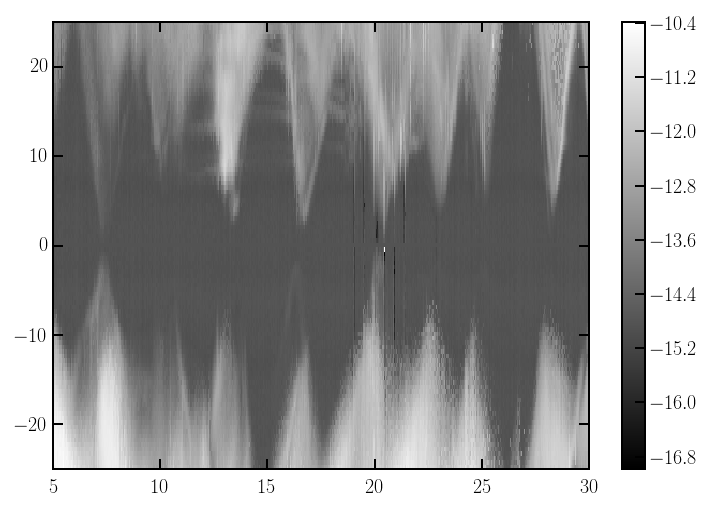

In [34]:
fig, ax = plt.subplots(figsize = (12,8))
limits = lvdt.df_extent(ampdf)
im = ax.imshow(np.log10(ampdf-ampdf.min().min()), extent=limits,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
cb = plt.colorbar(im)

In [25]:
import numpy.ma as ma
A = np.log10(ampdf-ampdf.min().min())/zf_cond
A = ma.masked_invalid(A)
A.mean()

-5049.3692480629998